importing model with surfactin

In [1]:
%run model_sucrose.ipynb

In [2]:
import numpy as np

In [11]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
fseof = FSEOF(model)
result = fseof.run(target = model.reactions.DM_surfactin_c)
df = result.data_frame

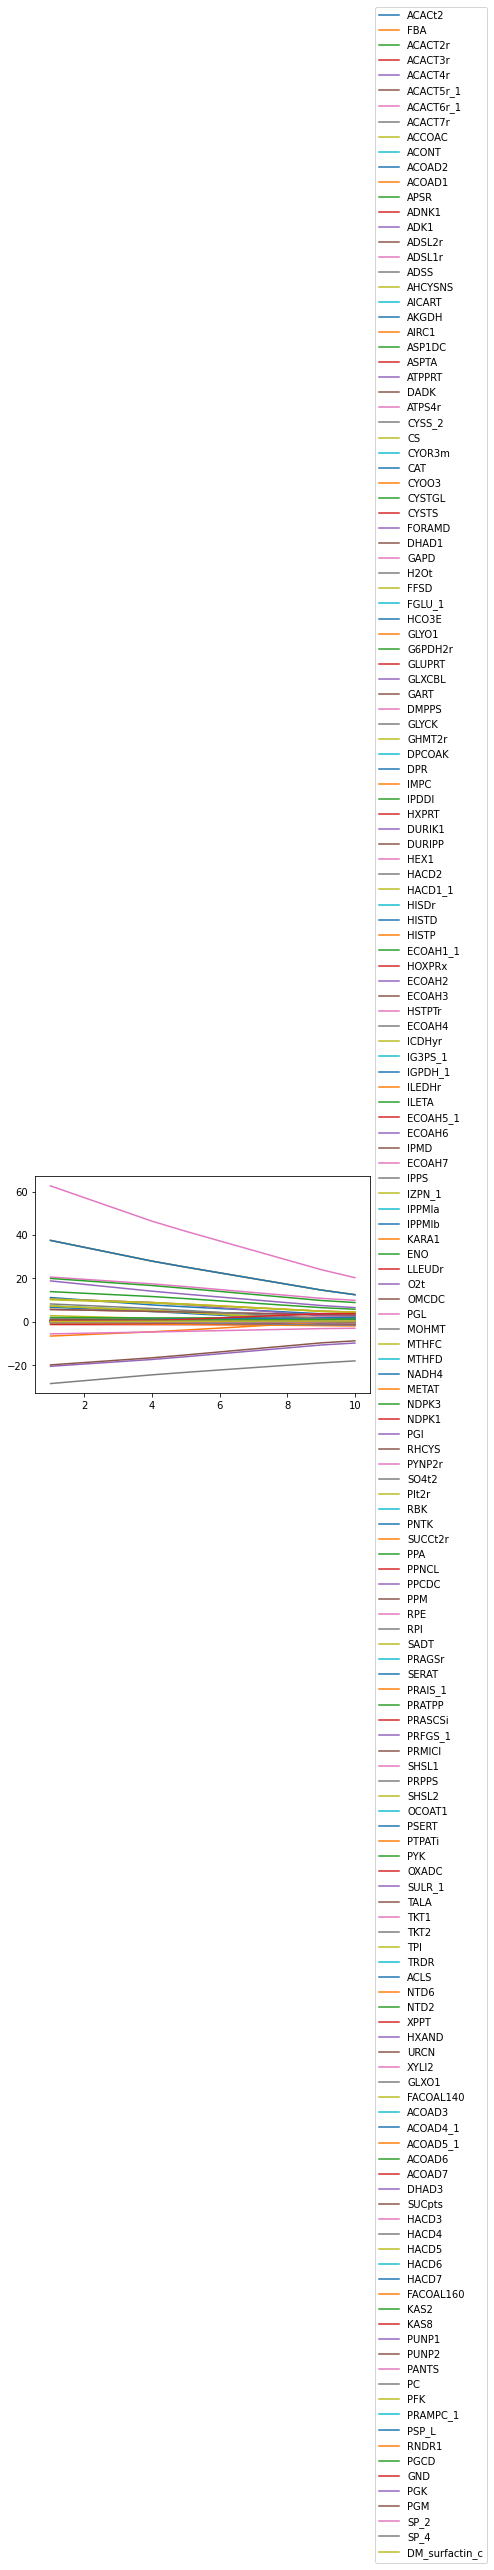

In [6]:
from matplotlib import pyplot as plt
result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [12]:
# sorting 
df= df.sort_values([1], ascending = False)
 
# removing genes from dataframe 
removed_zero = (df[1] != 0)
df = df.loc[removed_zero]

df.head()

,1,2,3,4,5,6,7,8,9,10
ATPS4r,62.612368,57.187515,51.762662,46.337809,41.668253,37.249920,32.831587,28.413253,23.994920,20.282517
NADH4,37.472065,34.290564,31.109064,27.927563,25.153216,22.513634,19.874052,17.234470,14.594888,12.443825
CYOO3,37.472065,34.290564,31.109064,27.927563,25.153216,22.513634,19.874052,17.234470,14.594888,12.443825
CYOR3m,37.472065,34.290564,31.109064,27.927563,25.153216,22.513634,19.874052,17.234470,14.594888,12.443825
GAPD,20.583523,19.533698,18.483873,17.434048,16.163779,14.812191,13.460603,12.109016,10.757428,9.854504


In [17]:
#def bar_color(df,color1,color2):
#    return np.where(df.values >=0,color1,color2).T

#fig = df.plot(legend=None, kind='bar', color=bar_color(df,'g','r'),figsize=(20, 4), grid =False);
#fig.set_ylabel('Change in flux')
#fig.set_xlabel('Gene names')
#fig.set_title('Flux scanning based on Enforced Objective Flux', size=30)

In [13]:
df['relative_change_in_flux'] = (df[10]-df[1])/df[1] +1

In [28]:
#target_reactions_df = df[df['relative_change_in_flux'] > 1.8]

In [14]:
df= df.sort_values(['relative_change_in_flux'], ascending = False)

In [15]:
df

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
GLYO1,0.029897,0.062262,0.094627,0.126992,0.159357,0.191722,0.224087,0.256452,0.288817,0.520449,17.408068
GART,0.030105,0.062450,0.094794,0.127139,0.159483,0.191827,0.224172,0.256516,0.288860,0.332798,11.054576
RPE,0.194107,0.174909,0.155712,0.136514,0.457035,0.897201,1.337368,1.777534,2.217701,2.108236,10.861205
DM_surfactin_c,0.032143,0.064286,0.096429,0.128571,0.160714,0.192857,0.225000,0.257143,0.289286,0.321429,10.000000
PNTK,0.032143,0.064286,0.096429,0.128571,0.160714,0.192857,0.225000,0.257143,0.289286,0.321429,9.999969
...,...,...,...,...,...,...,...,...,...,...,...
ACOAD1,-0.266172,-0.184406,-0.102640,-0.020875,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
HACD5,-0.266172,-0.184406,-0.102640,-0.020875,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
HACD6,-0.266172,-0.184406,-0.102640,-0.020875,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000
AKGDH,6.645558,5.989211,5.332865,4.676519,3.849059,2.960066,2.071073,1.182080,0.293086,0.000000,0.000000


In [30]:
df = target_reactions_df.drop(labels='relative_change_in_flux', axis=1)

Text(0.5, 1.0, 'Reactions with a relative change in Flux > 80%')

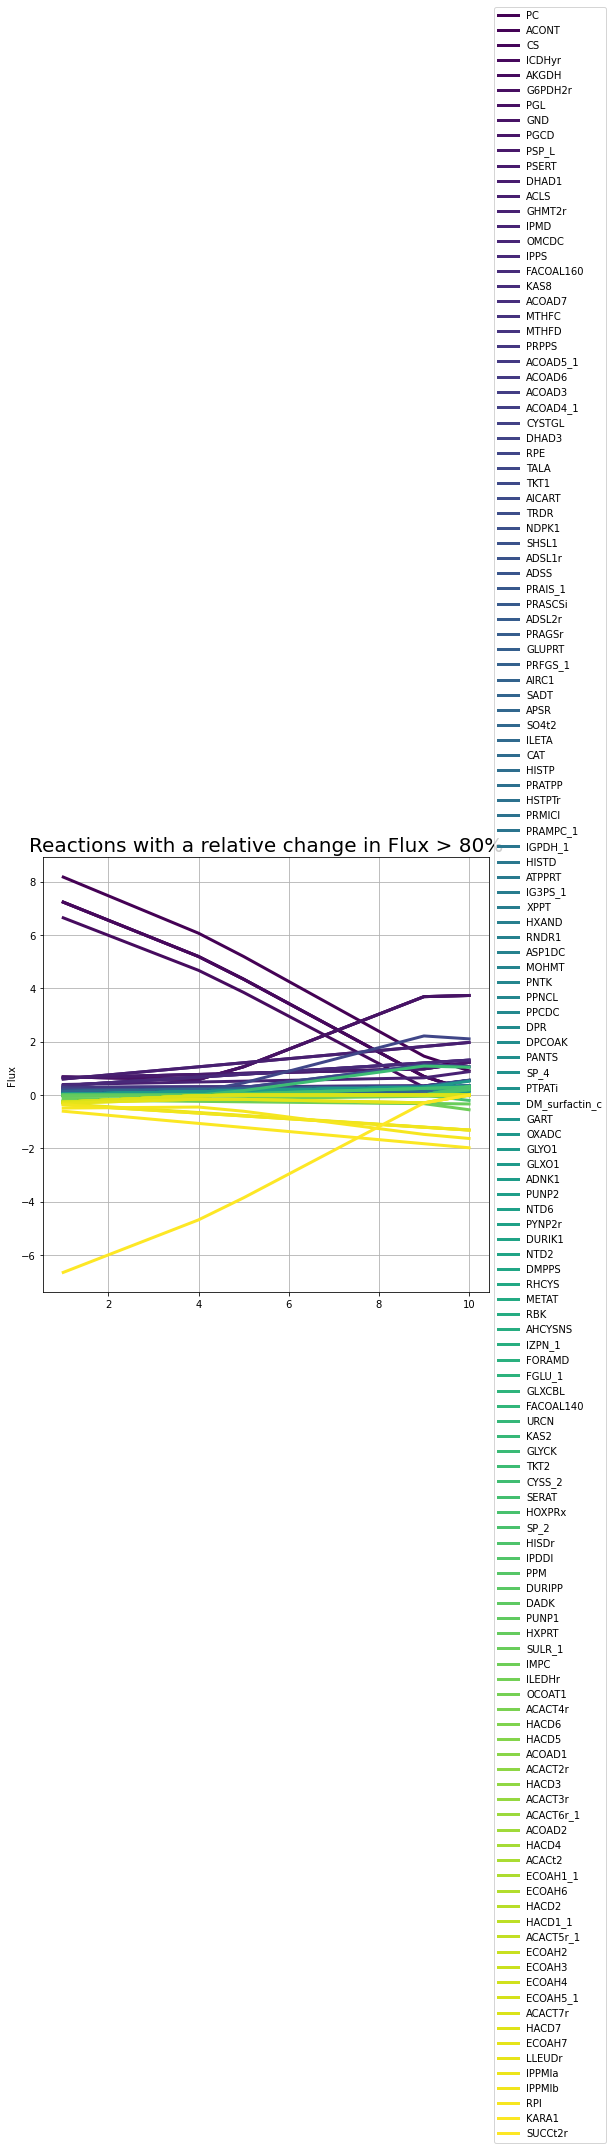

In [31]:
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 80%', size=20)

In [16]:
#lowest flux reactions
target_reactions_df.tail()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
ACOAD1,-0.266172,-0.184406,-0.102640,-0.020875,-0.000000,0.000000,-0.000000,-0.00000,-0.000000,0.0,0.0
HACD5,-0.266172,-0.184406,-0.102640,-0.020875,-0.000000,0.000000,-0.000000,-0.00000,-0.000000,0.0,0.0
HACD6,-0.266172,-0.184406,-0.102640,-0.020875,-0.000000,0.000000,-0.000000,-0.00000,-0.000000,0.0,0.0
AKGDH,6.645558,5.989211,5.332865,4.676519,3.849059,2.960066,2.071073,1.18208,0.293086,0.0,0.0
ACACT3r,-0.266172,-0.184406,-0.102640,-0.020875,-0.000000,0.000000,-0.000000,-0.00000,-0.000000,0.0,0.0


In [16]:
#higest flux reactions
target_reactions_df.head()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
PC,8.172529,7.471129,6.769729,6.068329,5.195816,4.261769,3.327722,2.393675,1.459628,0.910628,1.888575
CS,7.232546,6.553467,5.874389,5.195311,4.345120,3.433394,2.521669,1.609944,0.698219,0.171540,1.976282
ICDHyr,7.232546,6.553467,5.874389,5.195311,4.345120,3.433394,2.521669,1.609944,0.698219,0.171540,1.976282
ACONT,7.232546,6.553467,5.874389,5.195311,4.345120,3.433394,2.521669,1.609944,0.698219,0.171540,1.976282
AKGDH,6.645558,5.989211,5.332865,4.676519,3.849059,2.960066,2.071073,1.182080,0.293086,0.000000,2.000000
